# Background
<a id='background'></a>

The client, an insurance company, wants to create a model to forecast if their previous year's health insurance policyholders would also be inclined to buy vehicle insurance. Insurance policies provide compensation for specified losses or damages in exchange for regular premium payments. The premiums help cover potential costs, and the concept relies on probabilities to distribute risk among policyholders. The company wants to use demographic and policy-related information, such as age, gender, region, vehicle details, and premium amounts, to predict customer interest in vehicle insurance. This prediction will aid the company in tailoring communication strategies and optimizing its revenue.

# Data Exploration
<a id='explor'></a>

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [334]:
df= pd.read_csv('train.csv')

In [335]:
df.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
318095,318096,Female,29,1,14.0,1,< 1 Year,No,31038.0,152.0,10,0
121636,121637,Male,35,1,43.0,0,1-2 Year,Yes,2630.0,160.0,222,0
161380,161381,Female,38,1,28.0,0,1-2 Year,Yes,59487.0,26.0,191,1


## Variables Info

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


For consistency purposes, I want to change the variable names to lowercase.

In [338]:
# Changing variable names to lowercase
df.columns = df.columns.str.lower()

Below is a list of descriptions of the variables contained in the dataset:

- `id`: Unique ID for the customer
- `gender`:Gender of the customer
- `age`: Age of the customer
- `driving_license`: 0 : Customer does not have DL, 1 : Customer already has DL
- `region_code`: Unique code for the region of the customer
- `previously_insured`: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- `vehicle_age`: Age of the Vehicle
- `vehicle_damage`: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- `annual_premium`: The amount customer needs to pay as premium in a year
- `policy_sales_Channel`: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- `vintage`: Number of Days, Customer has been associated with the company
- `response`: 1 : Customer is interested, 0 : Customer is not interested

Since the data type of `id`, `region_code`, and `policy_sales_channel` are still in numerical form, while the value represents the categorical values, we will change it to string first.

In [339]:
# Converting datatype
df['id']= df['id'].astype(str)
df['region_code']= df['region_code'].astype(str).str.split('.').str[0]
df['policy_sales_channel']= df['policy_sales_channel'].astype(str).str.split('.').str[0]

In addition, for ease in interpreting statistical analysis, variables containing binary values will be converted to string. However, in the later process, the values will be converted back to an integer for modeling purposes.

In [340]:
var= ['driving_license', 'previously_insured', 'response']

for col in var:
    df[col] = df[col].astype(str)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  object 
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   driving_license       381109 non-null  object 
 4   region_code           381109 non-null  object 
 5   previously_insured    381109 non-null  object 
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   annual_premium        381109 non-null  float64
 9   policy_sales_channel  381109 non-null  object 
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 34.9+ MB


## Checking Null and Duplicated Values 

In [342]:
# Null values check
df.isna().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [343]:
# Duplicated values check
df.duplicated().sum()

0

It can be seen that there is no empty or duplicate data, so there is no need for further handling.

# EDA
<a id='eda'></a>

In [344]:
# Numerical data distribution
df.describe()

,age,annual_premium,vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


Below is a summarized interpretation of the above statistics:

- Age:
The average age of customers is approximately 38.82 years, with a standard deviation of 15.51.
The youngest customer is 20 years old, while the oldest is 85.
Half of the customers are 36 years old or younger.
- Annual Premium:
The average annual premium paid by customers is around 30564.39, with a standard deviation of 17213.16.
The lowest premium observed is 2630, while the highest is 540165.
- Vintage:
On average, customers have been with the company for about 154 days, with a standard deviation of 83.67.
The shortest tenure observed is 10 days, and the longest is 299 days.

## Visualizing Variables: `age` `annual_premium` `vintage`

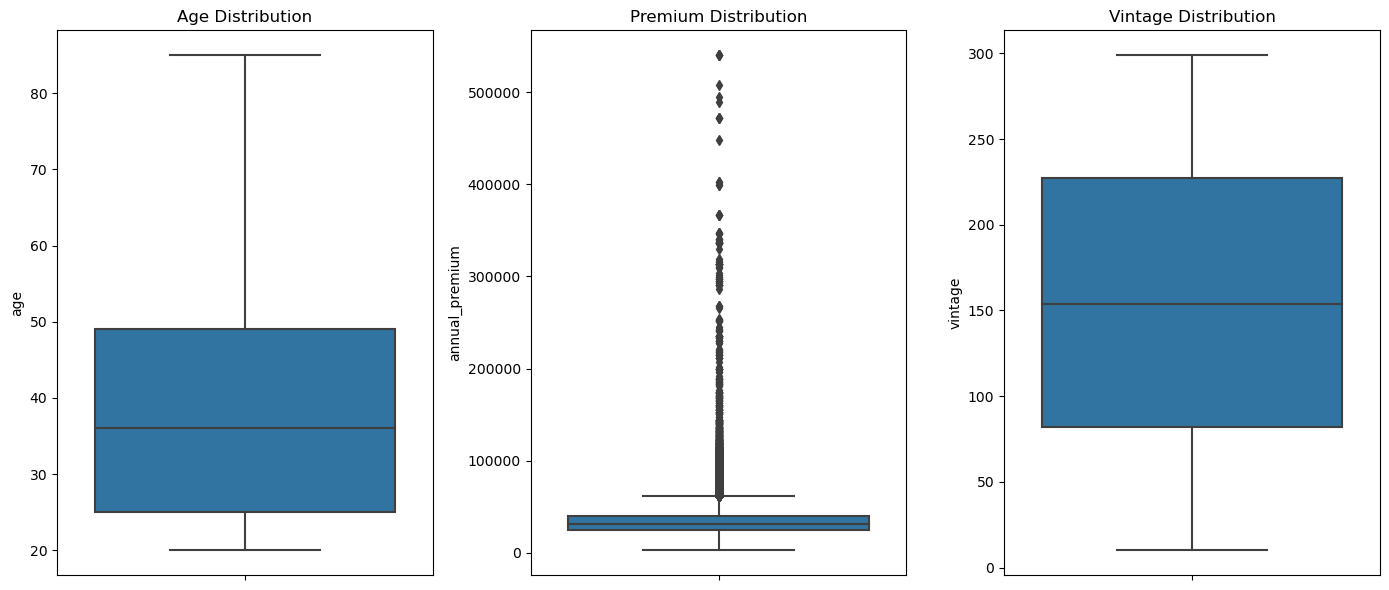

In [345]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='age')
plt.title("Age Distribution")

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='annual_premium')
plt.title("Premium Distribution")

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='vintage')
plt.title("Vintage Distribution")

plt.tight_layout()

- `age`:</br>
The age distribution of customers in our dataset is skewed to the right, with the majority falling between the ages of 20 to 26. This suggests that a significant portion of our customer base consists of younger individuals.

- `annual_premium`:</br>
Examining the distribution of annual premiums reveals that most customers pay premiums below 100,000 units. However, it's worth noting that there are outliers, with some customers paying premiums well above 500,000 units. This variation is reasonable, as it could be attributed to specific medical conditions or a desire for enhanced insurance coverage. The right-skewed nature of this distribution implies that there are relatively few customers with extremely high premiums, which may require further consideration during model development to avoid undue influence from outliers.

- `vintage`:</br>
The distribution of vintage, representing the duration since customers joined, shows a normal distribution pattern. This suggests that the all of the customers joined within the past year, with a tapering-off of the number of customers who joined earlier. This normal distribution in vintage indicates a relatively even distribution of customers across the duration since joining.

Overall, these insights into the distributions of age, annual premium, and vintage provide valuable information for data preprocessing and modeling, especially in addressing outliers and tailoring our approaches to different customer segments.

In [346]:
# Categorical data distribution
cat = df.select_dtypes(include= ['object']).columns.tolist()         
df[cat].drop('id', axis= 1).describe()

,gender,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel,response
count,381109,381109,381109,381109,381109,381109,381109,381109
unique,2,2,53,2,3,2,155,2
top,Male,1,28,0,1-2 Year,Yes,152,0
freq,206089,380297,106415,206481,200316,192413,134784,334399


Below is a summarized interpretation of the statistics for the categorical variables:

- Gender: The most frequent gender is 'Male' with a frequency of 206,089.
- Region Code: There are 53 unique region codes with the region code '28' being the most frequent with a frequency of 106,415.
- Vehicle Age: There are three unique categories: '1-2 Year', 'Less than 1 Year', and '2-3 Year' with the catgory of '1-2 Year' being the most common vehicle age with a frequency of 200,316.
- Policy Sales Channel: There are 155 unique policy sales channels with the channel '152' being the most frequently used policy sales channel with a frequency of 134,784.

## Visualizing Variables: `gender` `driving_license` `previously_insured` `vehicle_damage`

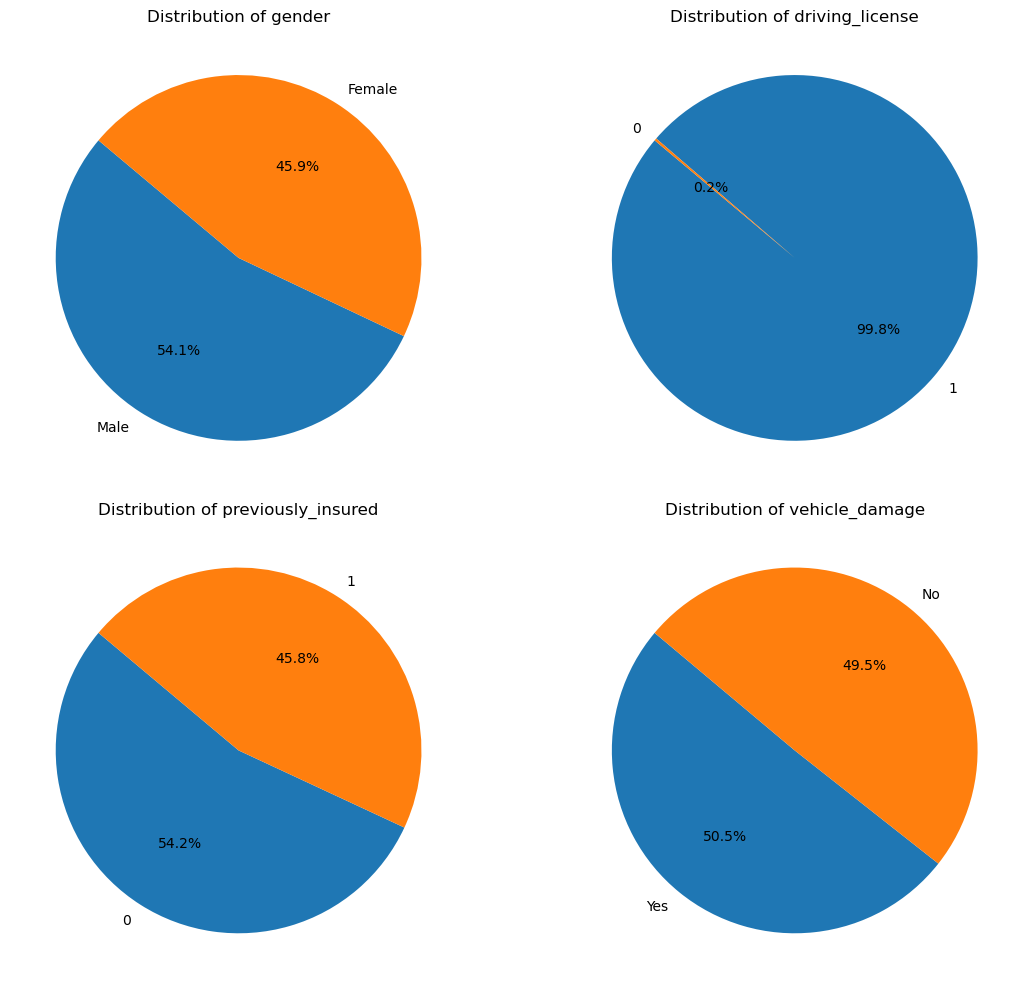

In [347]:
# Plotting distribution of 'gender', 'diving_license', 'previously_insured', 'vehicle_damage'
columns = ['gender', 'driving_license', 'previously_insured', 'vehicle_damage']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, col in enumerate(columns):
    counts = df[col].value_counts()
    
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Distribution of {col}')
    
plt.tight_layout()

## Visualizing Variables: `vehicle_age`

Text(0.5, 1.0, 'Distribution of Vehicle Age')

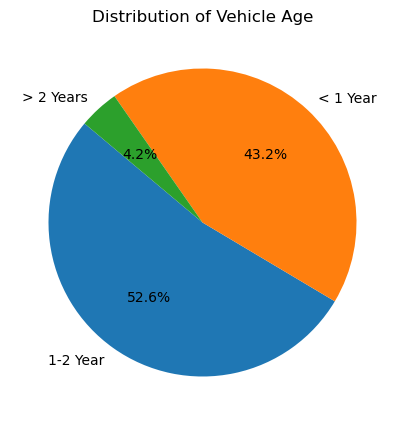

In [348]:
# Plotting distribution of 'vehicle_age'
counts = df['vehicle_age'].value_counts()

plt.figure(figsize= (6, 5))
plt.pie(counts, labels= counts.index, autopct= '%1.1f%%', startangle=140)
plt.title("Distribution of Vehicle Age")

## Visualizing Variables: `gender` vs `response`

Text(0.5, 1.0, 'Response Distribution by Gender')

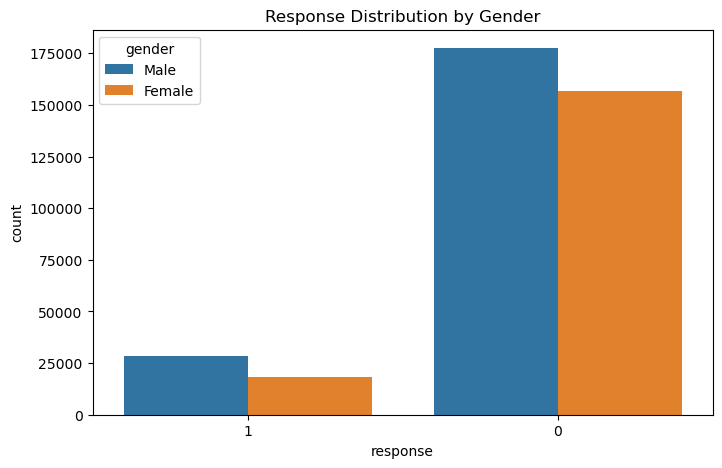

In [349]:
# Plotting distribution of 'gender' vs 'response'
plt.figure(figsize= (8, 5))
sns.countplot(df, x= 'response', hue= 'gender')
plt.title("Response Distribution by Gender")

## Visualizing Variables: `age` vs `response`

Text(0.5, 1.0, 'Age and Responses Distribution')

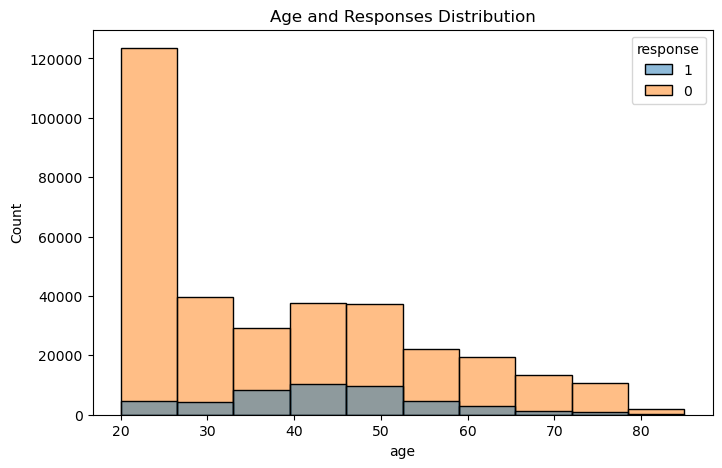

In [350]:
# Plotting distribution of 'age' vs 'response'
plt.figure(figsize= (8, 5))
sns.histplot(df, x= 'age', hue= 'response', bins= 10)
plt.title("Age and Responses Distribution")

## Visualizing Variables: Most Frequent `region_code`

Text(0.5, 1.0, '5 Most Frequent Region Code')

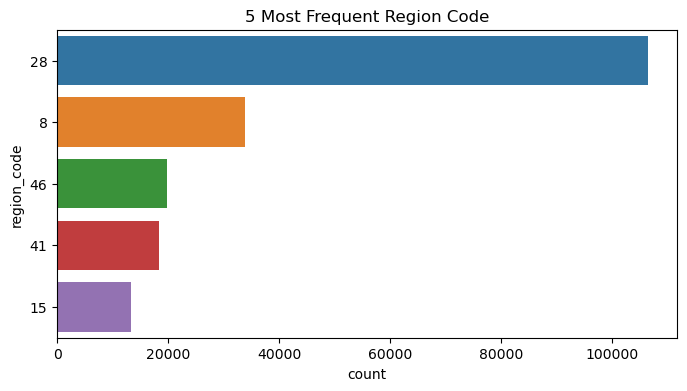

In [351]:
# Plotting 5 most frequent 'region_code'
reg_code= df.groupby('region_code').agg({'id': 'count'}).reset_index().sort_values(by= 'id', ascending= False)
reg_code= reg_code.rename(columns={'id': 'count'})

plt.figure(figsize= (8, 4))
sns.barplot(reg_code.head(5), x= 'count', y= 'region_code')
plt.title("5 Most Frequent Region Code")

## Visualizing Variables: Most Frequent `policy_sales_channel`

Text(0.5, 1.0, '5 Most Frequently Used Channel')

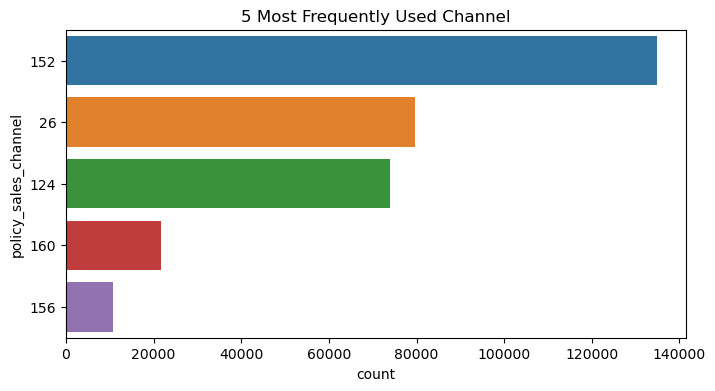

In [352]:
# Plotting 5 most frequently 'region_code'
channel= df.groupby('policy_sales_channel').agg({'id': 'count'}).reset_index().sort_values(by= 'id', ascending= False)
channel= channel.rename(columns= {'id': 'count'})

plt.figure(figsize= (8, 4))
sns.barplot(channel.head(5), x= 'count', y= 'policy_sales_channel')
plt.title("5 Most Frequently Used Channel")

# Data Preprocessing
<a id='preprocess'></a>

In [353]:
dfprep = df.copy()

In [354]:
dfprep.sample(3)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
44469,44470,Male,22,1,37,0,< 1 Year,Yes,26878.0,152,286,0
224633,224634,Male,60,1,47,1,1-2 Year,No,34747.0,16,294,0
252583,252584,Female,24,1,6,0,< 1 Year,Yes,29338.0,152,123,0


## Feature Encoding

In this process, I will change the data type of the variable from categorical to numeric. For several variables whose data I previously changed to strings, I will change them back to numeric.

### `gender` 

In [355]:
# Encoding 'gender': 0 for female, 1 for male
dfprep['gender_enc'] = dfprep['gender'].replace({'Male' : 1, 'Female': 0})

### `driving_license` `previously_insured` `response`

In [357]:
# Converting back to the numeric data type
var= ['driving_license', 'previously_insured', 'response']

for col in var:
    dfprep[col] = dfprep[col].astype(int)

### `vehicle_damage`

In [358]:
# Encoding 'vehicle_damage': 0 for No, 1 for Yes
dfprep['vehicle_damage'] = dfprep['vehicle_damage'].replace({'Yes': 1, 'No': 0})

### `vehicle_age`

In [359]:
# Encoding 'vehicle_age' using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dfprep['veh_age_enc'] = label_encoder.fit_transform(dfprep['vehicle_age'])

### `region_code` `policy_sales_channel`

Because there are many unique values for these two variables, I will categorize them based on the value count for each value in the dataset. For the variable `region_code`, values that have a value count of less than 13,000, I will categorize as 'others'. Meanwhile, for the variable `policy_sales_channel`, values that have a value count of less than 10,000, I will categorize as 'others'. After that, one-hot encoding will be carried out on both variables.

In [360]:
# Categorizing 'reg_code'
dfprep['reg_code_count'] = dfprep.groupby('region_code')['region_code'].transform('count')

reg_code_cluster= []

for i in range(len(dfprep)):
    if dfprep['reg_code_count'][i] < 13000:
        cluster= 'others'
    else:
        cluster = dfprep['region_code'][i]
    reg_code_cluster.append(cluster)
    
dfprep['reg_code_cluster'] = reg_code_cluster

In [361]:
# OHE 'reg_code'
dfprep= pd.get_dummies(dfprep, columns= ['reg_code_cluster'])

In [362]:
# Categorizing 'policy_sales_channel'
dfprep['channel_count'] = dfprep.groupby('policy_sales_channel')['policy_sales_channel'].transform('count')

channel_cluster= []

for i in range(len(dfprep)):
    if dfprep['channel_count'][i] < 10000:
        cluster= 'others'
    else:
        cluster= dfprep['policy_sales_channel'][i]
    channel_cluster.append(cluster)
    
dfprep['channel_cluster']= channel_cluster

In [363]:
# OHE 'policy_sales_channel'
dfprep= pd.get_dummies(dfprep, columns= ['channel_cluster'])

## Feature Selection

In this stage, several irrelevant features and several features that are already represented by other features resulting from the encoding feature will be removed.

In [364]:
dfprep.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response', 'gender_enc',
       'veh_age_enc', 'reg_code_count', 'reg_code_cluster_15',
       'reg_code_cluster_28', 'reg_code_cluster_41', 'reg_code_cluster_46',
       'reg_code_cluster_8', 'reg_code_cluster_others', 'channel_count',
       'channel_cluster_124', 'channel_cluster_152', 'channel_cluster_156',
       'channel_cluster_160', 'channel_cluster_26', 'channel_cluster_others'],
      dtype='object')

In [365]:
# Creating new DF with some features dropped
dfmodel = dfprep.drop(['id', 'gender', 'region_code', 'vehicle_age', 'policy_sales_channel', 'reg_code_count', 'channel_count'], axis= 1)

In [366]:
dfmodel.columns

Index(['age', 'driving_license', 'previously_insured', 'vehicle_damage',
       'annual_premium', 'vintage', 'response', 'gender_enc', 'veh_age_enc',
       'reg_code_cluster_15', 'reg_code_cluster_28', 'reg_code_cluster_41',
       'reg_code_cluster_46', 'reg_code_cluster_8', 'reg_code_cluster_others',
       'channel_cluster_124', 'channel_cluster_152', 'channel_cluster_156',
       'channel_cluster_160', 'channel_cluster_26', 'channel_cluster_others'],
      dtype='object')

## Data Splitting

In [367]:
# Splitting features and target
from sklearn.model_selection import train_test_split

X= dfmodel.drop('response', axis= 1)
y= dfmodel['response']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 0)

In [368]:
X_train.sample(3)

,age,driving_license,previously_insured,vehicle_damage,annual_premium,vintage,gender_enc,veh_age_enc,reg_code_cluster_15,reg_code_cluster_28,reg_code_cluster_41,reg_code_cluster_46,reg_code_cluster_8,reg_code_cluster_others,channel_cluster_124,channel_cluster_152,channel_cluster_156,channel_cluster_160,channel_cluster_26,channel_cluster_others
305464,54,1,1,0,51511.0,61,1,0,0,0,0,0,1,0,0,0,0,0,1,0
304027,44,1,0,0,38108.0,183,1,0,0,1,0,0,0,0,0,0,0,0,1,0
113499,48,1,0,1,34346.0,210,1,0,0,1,0,0,0,0,0,0,0,0,1,0


## Features Scaling

In [369]:
# Standardizing scale for some variables
from sklearn.preprocessing import RobustScaler

rs= RobustScaler()

to_scale = ['age', 'annual_premium', 'vintage']

for var in to_scale:
    scaler= rs.fit(X_train[[var]])
    X_train[var]= scaler.transform(X_train[[var]])
    X_test[var]= scaler.transform(X_test[[var]])

## Oversampling

The purpose of this process is to overcome the problem of class imbalance (number of responses 1 vs number of responses 2) so that the model can learn well from both classes by creating similar synthetic data.

In [370]:
y_train.value_counts()

0    234158
1     32618
Name: response, dtype: int64

In [371]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy= 'auto', random_state= 0)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [372]:
y_train.value_counts()

1    234158
0    234158
Name: response, dtype: int64

# Modeling
<a id='model'></a>

In this process, I will try to use several models and look for the model with the best overall performance in terms of several metrics.

In [373]:
# Importing library for modeling and evaluation
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [374]:
# Creating function to evaluate the model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print(f"Accuracy (Test): {accuracy_score(y_test, y_pred)}")
    print(f"Precision (Test): {precision_score(y_test, y_pred)}")
    print(f"Recall (Test): {recall_score(y_test, y_pred)}")
    print(f"F1 (Test): {f1_score(y_test, y_pred)}")
    
    print(f"roc_auc (Test proba): {roc_auc_score(y_test, y_pred_proba[:,1])}")
    print(f"roc_auc (Train proba): {roc_auc_score(y_train, y_pred_proba_train[:,1])}")
    
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

### Logistic Regression

In [74]:
lr= LogisticRegression()
lr.fit(X_train, y_train)

eval_classification(lr)

Accuracy (Test): 0.6729290755949726
Precision (Test): 0.2675974867856787
Recall (Test): 0.9520295202952029
F1 (Test): 0.4177682283151946
roc_auc (Test proba): 0.8432691537125304
roc_auc (Train proba): 0.8456937021329516
roc_auc (crossval train): 0.7436484481480268
roc_auc (crossval test): 0.7441094770886137


### Decission Tree

In [77]:
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)

eval_classification(dt)

Accuracy (Test): 0.8170169592331173
Precision (Test): 0.285184020132117
Recall (Test): 0.3216718705648595
F1 (Test): 0.3023310101043786
roc_auc (Test proba): 0.6047763164262631
roc_auc (Train proba): 0.9999988041758687
roc_auc (crossval train): 0.9999883498058357
roc_auc (crossval test): 0.6000181479014349


### Gaussian NB

In [81]:
gnb= GaussianNB()
gnb.fit(X_train, y_train)

eval_classification(gnb)

Accuracy (Test): 0.6852002483972256
Precision (Test): 0.2728969636635142
Recall (Test): 0.933721260289526
F1 (Test): 0.42235346985940814
roc_auc (Test proba): 0.8267357353422021
roc_auc (Train proba): 0.8278570503988951
roc_auc (crossval train): 0.8221389795167902
roc_auc (crossval test): 0.8221034665108371


### Random Forrest

In [75]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

eval_classification(rf)

Accuracy (Test): 0.8088303464441587
Precision (Test): 0.3086590113843576
Recall (Test): 0.4444365597502129
F1 (Test): 0.3643079428787482
roc_auc (Test proba): 0.8225134217622674
roc_auc (Train proba): 0.9999938258491406
roc_auc (crossval train): 0.9999790920225653
roc_auc (crossval test): 0.8220637730733786


### XGB

In [375]:
xgb= XGBClassifier()
xgb.fit(X_train, y_train)

eval_classification(xgb)

Accuracy (Test): 0.8284922113475549
Precision (Test): 0.3521783398531697
Recall (Test): 0.46636389440817483
F1 (Test): 0.40130675052666925
roc_auc (Test proba): 0.8477701042502898
roc_auc (Train proba): 0.9684439022364573
roc_auc (crossval train): 0.8746520386220183
roc_auc (crossval test): 0.8519885796376097


## Interpreting Result

Interpretation Summary:

- Best Accuracy Rate: XGBoost with 82.84%.
- Best Precision Rate: XGBoost with 35.21%.
- Best Recall Rate: Logistic Regression with 95.20%.
- Best ROC AUC: XGBoost with 84.77%.
- Cross-Validation Scores: The XGBoost model shows stable and robust performance in separating classes with ROC AUC of about 87.46% on training data and 84.77% on test data across cross-validation folds.
- Best Overfit Rate: Gaussian Naive Bayes with 0.001.

Based on existing metrics, the model with the best overall score is XGBoost. Here are the reasons why XGBoost can be considered the best model:
- Accuracy: XGBoost has high accuracy, demonstrating its ability to correctly classify most of the test data.
- Precision: XGBoost has the highest precision among all models, demonstrating its ability to correctly identify true positives and reduce false positives.
- Recall: Although XGBoost does not have the highest recall, it does have quite good recall, indicating its ability to correctly identify the majority of positive cases.
- ROC AUC: XGBoost has the highest ROC AUC, indicating that this model has the best ability in separating positive and negative classes.
- Overfit Rate: XGBoost's overfitting rate is relatively low compared to other models, indicating that this model tends to be more stable and can generalize to new data.
- Cross-Validation Scores: XGBoost shows stable and robust performance across cross-validation folds, with ROC AUC of approximately 87.49% on training data and 85.28% on test data.

Based on these considerations, XGBoost is the best model of all the models tested. However, it is still necessary to consider business factors and specific needs before making a final decision.

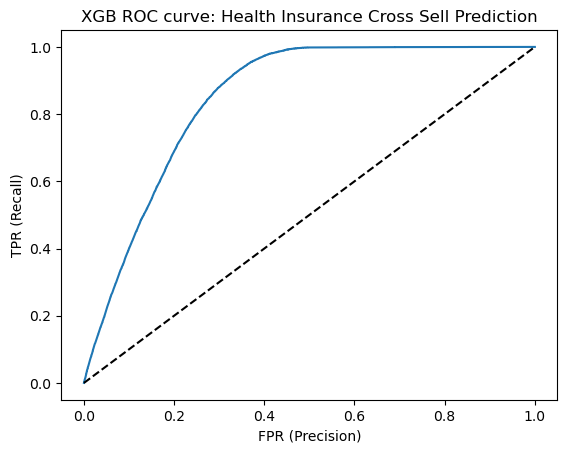

Area under curve (AUC):  0.8477701042502898


In [101]:
y_score = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.title('XGB ROC curve: Health Insurance Cross Sell Prediction')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## Hyperparameter Tuning

After trying to do hyperparameter tuning, it turns out the resulting scores are exactly the same. Possibly because the hyperparameter space is not wide enough. However, due to the limited computing power of my computer, I will not be doing any further tuning. If you want to try it, I wrote the code below. Please change the hyperparameter space to what you want.

In this process, hyperparameter tuning will be carried out only on XGboost which I consider to have the best performance compared to other models.

In [95]:
from skopt import BayesSearchCV

def tuning(model, param_space, n_iter= 50, cv= 5):
    
    opt = BayesSearchCV(model, param_space, n_iter= n_iter, cv= cv, n_jobs= -1)
    opt.fit(X_train, y_train)
    
    best_estimator= opt.best_estimator_
    
    val_score = best_estimator.score(X_test, y_test)

    print(f"Best parameters: {best_estimator}")
    print(f"roc_auc: {val_score:.2f}")

    return best_estimator

In [89]:
from scipy.stats import randint, uniform

# Hyperparameter space
param_space = {'n_estimators': [50, 100, 150],
               'max_depth': [3, 4, 5, 6, 7],
               'learning_rate': [0.05, 0.1, 0.15, 0.2],
               'subsample': [0.7, 0.8, 0.9],
               'colsample_bytree': [0.7, 0.8, 0.9],
               'gamma': [0, 0.05, 0.1],
               'min_child_weight': [3, 4, 5, 6, 7, 8, 9],
               'reg_alpha': [0, 0.1, 0.5, 1],
               'reg_lambda': [0, 0.1, 0.5, 1]
              }

best_model = tuning(xgb, param_space, n_iter=50, cv=5)

Model Terbaik: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Akurasi pada Data Validasi: 0.84


In [94]:
eval_classification(best_model)

Accuracy (Test): 0.8284922113475549
Precision (Test): 0.3521783398531697
Recall (Test): 0.46636389440817483
F1 (Test): 0.40130675052666925
roc_auc (Test proba): 0.8477701042502898
roc_auc (Train proba): 0.9684439022364573
roc_auc (crossval train): 0.8746520386220183
roc_auc (crossval test): 0.8519885796376097


## Feature Importance

In [500]:
# Creating and showing feature importance's score
feature_importance = xgb.feature_importances_

feature_df= pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df= feature_df.sort_values(by= 'Importance', ascending= False)

print(feature_df)

                    Feature  Importance
2        previously_insured    0.812346
3            vehicle_damage    0.108285
0                       age    0.030913
17      channel_cluster_160    0.013604
15      channel_cluster_152    0.008219
1           driving_license    0.004814
18       channel_cluster_26    0.002974
5                   vintage    0.002211
8       reg_code_cluster_15    0.001935
7               veh_age_enc    0.001761
9       reg_code_cluster_28    0.001703
12       reg_code_cluster_8    0.001662
16      channel_cluster_156    0.001537
10      reg_code_cluster_41    0.001534
11      reg_code_cluster_46    0.001218
6                gender_enc    0.001181
14      channel_cluster_124    0.001100
13  reg_code_cluster_others    0.001084
19   channel_cluster_others    0.000994
4            annual_premium    0.000926


The feature importance scores above indicate the relative importance of each feature in making predictions with the XGBoost model. The higher the feature importance score, the more influential the feature is on the model prediction results.

Keep in mind that these scores are based on the specific dataset and the model that was trained. They provide insights into which features were most influential for this particular set of data, but the importance may vary in different contexts or with different datasets.

# Pedicting Test Data
<a id='predict'></a>

In [480]:
dftest= pd.read_csv('test.csv')

In [481]:
dftest.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [482]:
# Changing variable names to lowercase
dftest.columns = dftest.columns.str.lower()

In [483]:
# Converting datatype
dftest['id']= dftest['id'].astype(str)
dftest['region_code']= dftest['region_code'].astype(str).str.split('.').str[0]
dftest['policy_sales_channel']= dftest['policy_sales_channel'].astype(str).str.split('.').str[0]

In [484]:
var= ['driving_license', 'previously_insured']

for col in var:
    dftest[col] = dftest[col].astype(str)

## Encoding 

In [485]:
# Encoding 'gender': 0 for female, 1 for male
dftest['gender_enc'] = dftest['gender'].replace({'Male' : 1, 'Female': 0})

In [486]:
# Converting back to the numeric data type
var= ['driving_license', 'previously_insured']

for col in var:
    dftest[col] = dftest[col].astype(int)

In [487]:
# Encoding 'vehicle_damage': 0 for No, 1 for Yes
dftest['vehicle_damage'] = dftest['vehicle_damage'].replace({'Yes': 1, 'No': 0})

In [488]:
# Encoding 'vehicle_age' using label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dftest['veh_age_enc'] = label_encoder.fit_transform(dftest['vehicle_age'])

In [489]:
# Categorizing 'reg_code'
dftest['reg_code_count'] = dftest.groupby('region_code')['region_code'].transform('count')

reg_code_cluster= []

for i in range(len(dftest)):
    if dftest['reg_code_count'][i] < 13000:
        cluster= 'others'
    else:
        cluster = dftest['region_code'][i]
    reg_code_cluster.append(cluster)
    
dftest['reg_code_cluster'] = reg_code_cluster

# OHE 'reg_code'
dftest= pd.get_dummies(dftest, columns= ['reg_code_cluster'])

In [490]:
# Categorizing 'policy_sales_channel'
dftest['channel_count'] = dftest.groupby('policy_sales_channel')['policy_sales_channel'].transform('count')

channel_cluster= []

for i in range(len(dftest)):
    if dftest['channel_count'][i] < 10000:
        cluster= 'others'
    else:
        cluster= dftest['policy_sales_channel'][i]
    channel_cluster.append(cluster)
    
dftest['channel_cluster']= channel_cluster

# OHE 'policy_sales_channel'
dftest= pd.get_dummies(dftest, columns= ['channel_cluster'])

## Feature Selection

In [491]:
dftest.drop(['gender', 'region_code', 'vehicle_age', 'policy_sales_channel', 'reg_code_count', 'channel_count'], axis= 1, inplace= True)

In [492]:
dftest.columns

Index(['id', 'age', 'driving_license', 'previously_insured', 'vehicle_damage',
       'annual_premium', 'vintage', 'gender_enc', 'veh_age_enc',
       'reg_code_cluster_28', 'reg_code_cluster_others', 'channel_cluster_124',
       'channel_cluster_152', 'channel_cluster_26', 'channel_cluster_others'],
      dtype='object')

There is a difference in the number of features between the new test data and train data due to the OHE encoding results for categorical values that are not present in the new test data. Therefore, I will add a new column to have the same number of columns and column order as the train data.

In [493]:
# Creating features in dftest to match X_train features
train_feat= X_train.columns.to_list()
test_feat= dftest.columns.to_list()

for var in train_feat:
    if var not in test_feat:
        dftest[var] = 0

In [494]:
# Rerranging features
dftest = dftest[['id'] + train_feat]

In [495]:
X_train.columns

Index(['age', 'driving_license', 'previously_insured', 'vehicle_damage',
       'annual_premium', 'vintage', 'gender_enc', 'veh_age_enc',
       'reg_code_cluster_15', 'reg_code_cluster_28', 'reg_code_cluster_41',
       'reg_code_cluster_46', 'reg_code_cluster_8', 'reg_code_cluster_others',
       'channel_cluster_124', 'channel_cluster_152', 'channel_cluster_156',
       'channel_cluster_160', 'channel_cluster_26', 'channel_cluster_others'],
      dtype='object')

In [496]:
dftest.columns

Index(['id', 'age', 'driving_license', 'previously_insured', 'vehicle_damage',
       'annual_premium', 'vintage', 'gender_enc', 'veh_age_enc',
       'reg_code_cluster_15', 'reg_code_cluster_28', 'reg_code_cluster_41',
       'reg_code_cluster_46', 'reg_code_cluster_8', 'reg_code_cluster_others',
       'channel_cluster_124', 'channel_cluster_152', 'channel_cluster_156',
       'channel_cluster_160', 'channel_cluster_26', 'channel_cluster_others'],
      dtype='object')

Please note that I still include the `id` feature. This is because the prediction results generated by the model are associated with specific id values. The id feature serves as a crucial link between the original data points and their corresponding predictions, allowing for easy identification and evaluation of individual instances within the dataset.

## Normalization

In [472]:
# Standardizing scale for some variables
from sklearn.preprocessing import RobustScaler

rs= RobustScaler()

to_scale = ['age', 'annual_premium', 'vintage']

for var in to_scale:
    scaler= rs.fit(dftest[[var]])
    dftest[var]= scaler.transform(dftest[[var]])

## Prediction & Result

In [473]:
y_pred = xgb.predict(dftest.drop('id', axis= 1))

In [478]:
dftest['prediction'] = y_pred
dftest['prediction'].value_counts()

0    105410
1     21627
Name: prediction, dtype: int64

In [479]:
dftest[['id', 'prediction']].sample(20)

,id,prediction
105914,487024,0
66121,447231,0
24009,405119,0
31267,412377,0
9613,390723,0
33302,414412,0
95312,476422,0
72951,454061,0
114069,495179,0
92524,473634,0
